In [3]:
import cv2 as cv
import matplotlib.pylab as plt
import xmltodict
import glob
import json

import warnings
warnings.filterwarnings('ignore')

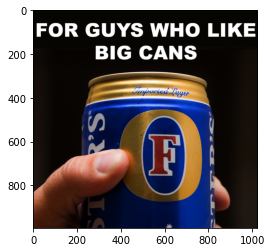

In [4]:
# Load image
img = cv.imread('/home/idl/Downloads/openlogo/JPEGImages/1034987742.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img);

In [5]:
files = glob.glob('/home/idl/Downloads/openlogo/Annotations/*.xml')
print(len(files), files[0])

27083 /home/idl/Downloads/openlogo/Annotations/lexusimg000155.xml


In [6]:
cnt = 0
for fname in files :
    with open(fname) as fd :
        doc = xmltodict.parse(fd.read())
    size = doc['annotation']['size']
    try :
        bbx = doc['annotation']['object']['bndbox']
    except :
        bbx = doc['annotation']['object'][1]['bndbox']
    x = (int(bbx['xmin']) + int(bbx['xmax']))/2./int(size['width'])
    y = (int(bbx['ymin']) + int(bbx['ymax']))/2./int(size['height'])
    w = (int(bbx['xmax']) - int(bbx['xmin']))/int(size['width'])
    h = (int(bbx['ymax']) - int(bbx['ymin']))/int(size['height'])
    if (w<=0.5 and h<=0.5) :
        savename = fname.replace('.xml', '.txt').replace('Annotations/', 'AnnotationsYOLO/')
        with open(savename, 'w') as fd :
            fd.write(f"0\t{x}\t{y}\t{w}\t{h}")
    else :
        cnt += 1

In [7]:
cnt

3443

In [8]:
import os
import tqdm
import numpy as np

os.chdir("/home/idl/Downloads/openlogo/JPEGImages/")

txts = glob.glob("*.txt")
txt_names = [txt[:-4] for txt in txts]

imgs = glob.glob("*.jpg")
img_names = [img[:-4] for img in imgs]

main_list = np.setdiff1d(img_names, txt_names)
for ii in tqdm.tqdm(range(len(main_list))) :
    img = main_list[ii]
    dels = f"/home/idl/Downloads/openlogo/JPEGImages/{img}.jpg"
    !rm {dels}

100%|██████████| 4284/4284 [08:56<00:00,  7.98it/s]


In [9]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

In [10]:
classes = np.sort(glob.glob("/home/idl/Downloads/openlogo/ImageSets/class_sep/*.txt"))

txts = glob.glob("/home/idl/Downloads/openlogo/JPEGImages/*.txt")
txt_names = [txt[40:-4] for txt in txts]

dicc = {}
for ii in tqdm.tqdm(range(0, len(classes), 2)) :
    fnames = []
    with open(classes[ii+1], 'r') as fd :
        while True:
            line = fd.readline()
            if not line:
                break
            fnames.append(line.rstrip())
    with open(classes[ii], 'r') as fd :
        while True:
            line = fd.readline()
            if not line:
                break
            fnames.append(line.rstrip())
    all_files = intersection(fnames, txt_names)
    dicc[classes[ii][49:-9]] = len(all_files)
    

100%|██████████| 354/354 [00:14<00:00, 23.70it/s] 


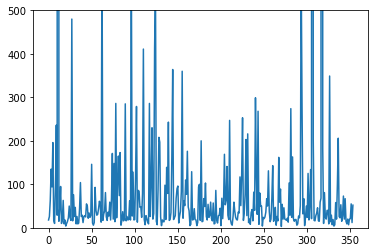

In [11]:
cnt_lst = [dicc[key] for key in dicc.keys()]
plt.plot(cnt_lst)
plt.ylim([0,500])
plt.show()

In [12]:
print(len(dicc.keys()))
print(dicc)

354
{'3m': 18, 'abus': 26, 'accenture': 63, 'adidas1': 135, 'adidas': 94, 'adidas_text_': 196, 'airhawk': 17, 'airness': 10, 'aldi': 94, 'aldi_text_': 236, 'alfaromeo': 29, 'all': 23640, 'allett': 15, 'allianz': 44, 'allianz_text_': 95, 'aluratek': 10, 'aluratek_text_': 18, 'amazon': 63, 'amcrest': 9, 'amcrest_text_': 18, 'americanexpress': 4, 'americanexpress_text_': 10, 'android': 15, 'anz': 23, 'anz_text_': 50, 'apc': 23, 'apecase': 17, 'apple': 480, 'aquapac_text': 16, 'aral': 76, 'armani': 26, 'armitron': 47, 'aspirin': 9, 'asus': 26, 'at_and_t': 9, 'athalon': 11, 'audi': 45, 'audi_text_': 104, 'axa': 26, 'bacardi': 29, 'bankofamerica': 12, 'bankofamerica_text_': 26, 'barbie': 28, 'barclays': 25, 'base': 55, 'basf': 50, 'batman': 22, 'bayer': 34, 'bbc': 24, 'bbva': 28, 'becks': 146, 'bellataylor': 11, 'bellodigital': 6, 'bellodigital_text_': 12, 'bem': 93, 'benrus': 40, 'bershka': 29, 'bfgoodrich': 31, 'bik': 44, 'bionade': 61, 'blackmores': 53, 'blizzardentertainment': 13, 'bmw':

In [14]:
import random
import tqdm

# txts = glob.glob("/home/idl/Downloads/openlogo/JPEGImages/*.txt")
# txt_names = [txt[40:-4] for txt in txts]
# random.shuffle(txt_names)

# test_size = int(len(txt_names)*0.1)

test_list = txt_names[2*test_size:]
for ii in tqdm.tqdm(range(len(test_list))) :
    img = test_list[ii]
    fname = f"/home/idl/Downloads/openlogo/JPEGImages/{img}.jpg"
    dest = f"/home/idl/Downloads/openlogo/train-logo/{img}.jpg"
    !mv {fname} {dest}
    
    fname = f"/home/idl/Downloads/openlogo/JPEGImages/{img}.txt"
    dest = f"/home/idl/Downloads/openlogo/train-logo/{img}.txt"
    !mv {fname} {dest}

100%|██████████| 2364/2364 [09:58<00:00,  3.95it/s]


In [18]:
imgs = glob.glob("/home/idl/Documents/InsightProject/yolov5/data/train-logo/*.jpg")
img_names = [img for img in imgs]
with open('/home/idl/Documents/InsightProject/yolov5/data/train-logo.txt', 'w') as fd:
    for item in img_names :
        fd.write(f"{item}\n")